In [3]:
import sys
!{sys.executable} -m pip install plotly


In [5]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots


In [6]:
data_India=pd.read_csv("E:/Projects/Covid19-1/covid_19_india.csv")

In [7]:
data_India.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,11-08-2021,6:00 PM,Kerala,1,0,0,0,1
1,2,11-08-2021,6:00 PM,Kerala,1,0,0,0,1
2,3,11-08-2021,6:00 PM,Kerala,2,0,0,0,2
3,4,11-08-2021,6:00 PM,Kerala,3,0,0,0,3
4,5,11-08-2021,6:00 PM,Kerala,3,0,0,0,3
5,6,11-08-2021,6:00 PM,Kerala,3,0,0,0,3
6,7,11-08-2021,6:00 PM,Kerala,3,0,0,0,3
7,8,11-08-2021,6:00 PM,Kerala,3,0,0,0,3
8,9,11-08-2021,6:00 PM,Kerala,3,0,0,0,3
9,10,11-08-2021,6:00 PM,Kerala,3,0,0,0,3


In [8]:
data_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [9]:
data_India.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [10]:
data_India.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],inplace= True, axis=1)

In [11]:
data_India.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,11-08-2021,Kerala,0,0,1
1,11-08-2021,Kerala,0,0,1
2,11-08-2021,Kerala,0,0,2
3,11-08-2021,Kerala,0,0,3
4,11-08-2021,Kerala,0,0,3


In [12]:
data_India['Date']=pd.to_datetime(data_India['Date'], format='%d-%m-%Y')

In [13]:
data_India.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2021-08-11,Kerala,0,0,1
1,2021-08-11,Kerala,0,0,1
2,2021-08-11,Kerala,0,0,2
3,2021-08-11,Kerala,0,0,3
4,2021-08-11,Kerala,0,0,3


In [16]:
# Active Cases
data_India['Active_Cases'] = data_India["Confirmed"]-(data_India["Cured"]+data_India["Deaths"])
data_India.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
18105,2020-02-03,Telangana,638410,3831,650353,8112
18106,2020-02-02,Tripura,77811,773,80660,2076
18107,2020-02-01,Uttarakhand,334650,7368,342462,444
18108,2020-01-31,Uttar Pradesh,1685492,22775,1708812,545
18109,2020-01-30,West Bengal,1506532,18252,1534999,10215


In [17]:
statewise=pd.pivot_table(data_India, values=[ "Confirmed","Deaths","Cured"],index="State/UnionTerritory",aggfunc=max)


In [18]:
statewise["Recovery Rate"]= statewise["Cured"]*100/statewise["Confirmed"]
statewise["Mortality Rate"]= statewise["Deaths"]*100/statewise["Confirmed"]

In [19]:
statewise = statewise.sort_values(by = "Confirmed", ascending=False)

In [20]:
statewise.style.background_gradient(cmap="cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


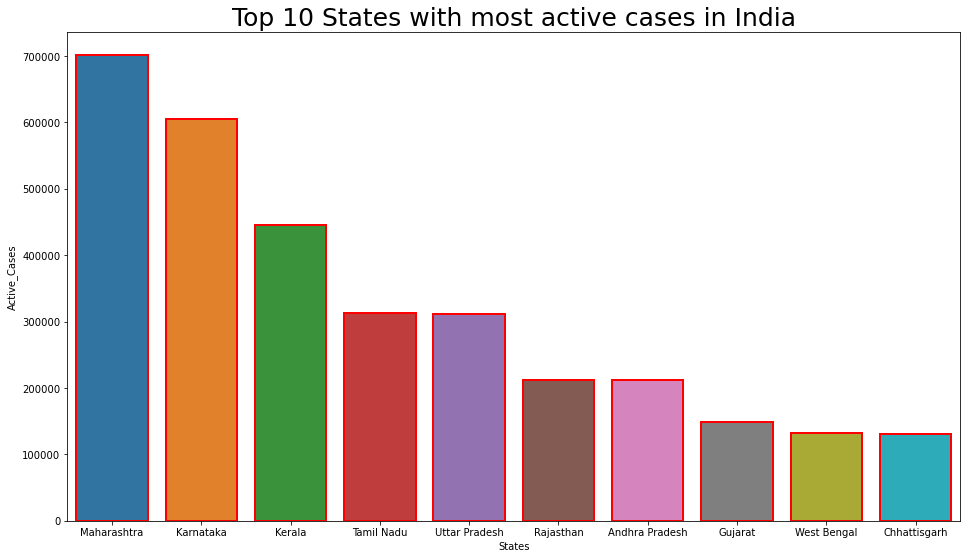

In [28]:
#Top 10 states Active cases 

top_10_active_states= data_India.groupby(by = 'State/UnionTerritory').max()[['Active_Cases','Date']].sort_values(by=['Active_Cases'],ascending=False).reset_index()
fig = plt.figure(figsize=(16,9))
plt.title("Top 10 States with most active cases in India",size=25)
ax=sns.barplot(data=top_10_active_states.iloc[:10],y="Active_Cases",x="State/UnionTerritory",linewidth=2,edgecolor='red')


plt.xlabel("States")
plt.ylabel("Active_Cases")
plt.show()

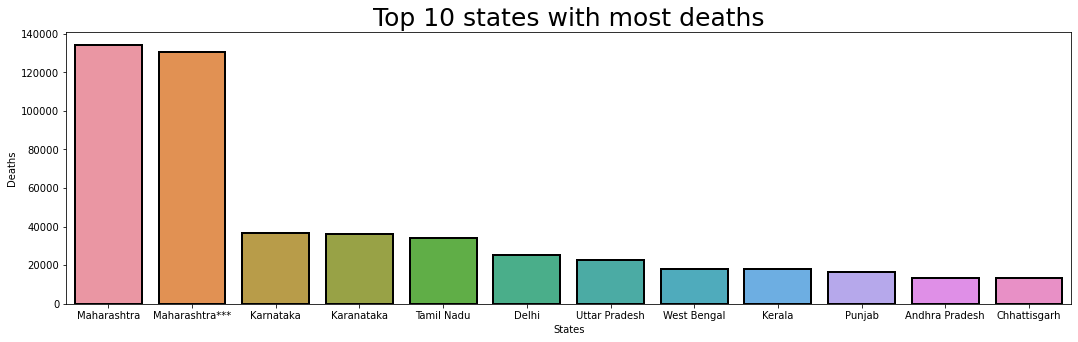

In [46]:
# Top states with highest deaths 

top_10_deaths=data_India.groupby(by='State/UnionTerritory').max()[['Deaths','Date']].sort_values(by=['Deaths'],ascending=False).reset_index()

fig=plt.figure(figsize=(18,5))

plt.title("Top 10 states with most deaths",size=25)

ax=sns.barplot(data=top_10_deaths.iloc[:12],y="Deaths",x='State/UnionTerritory',linewidth=2,edgecolor='black')

plt.xlabel('States')
plt.ylabel('Deaths')
plt.show()


Text(0.5, 1.0, 'Top 5 affected states in India')

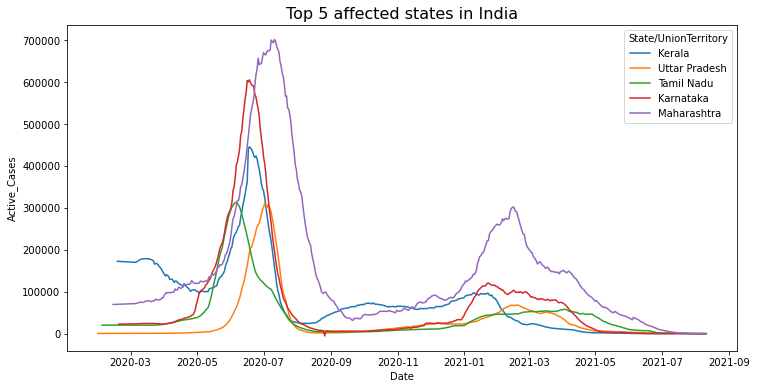

In [59]:
# Growth trend

fig = plt.figure(figsize=(12,6))
a=data_India['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh'])

ax = sns.lineplot(data = data_India[a],x= "Date",y= "Active_Cases", hue="State/UnionTerritory")


ax.set_title("Top 5 affected states in India",size=16)

